In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

In [2]:
bitcoin_df = pd.read_csv("./Resources/coin_Bitcoin.csv")

In [3]:
bitcoin2020_df = bitcoin_df[(bitcoin_df["Date"] >= '2020-10-01')]
bitcoin2020_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2712,2713,Bitcoin,BTC,2020-10-01 23:59:59,10933.624309,10472.356518,10795.254743,10619.451908,4.002313e+10,1.965121e+11
2713,2714,Bitcoin,BTC,2020-10-02 23:59:59,10657.837986,10416.689205,10619.821216,10575.975042,4.866145e+10,1.957161e+11
2714,2715,Bitcoin,BTC,2020-10-03 23:59:59,10598.940803,10511.129780,10575.100636,10549.328900,4.466027e+10,1.952332e+11
2715,2716,Bitcoin,BTC,2020-10-04 23:59:59,10686.000098,10534.391837,10550.440671,10669.582543,7.125178e+10,1.974689e+11
2716,2717,Bitcoin,BTC,2020-10-05 23:59:59,10793.507851,10634.600163,10676.528956,10793.339428,4.753758e+10,1.997696e+11


In [4]:
bitcoin2020_df.drop(columns = ['SNo'])
bitcoin2020_df.set_index('Date')

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-10-01 23:59:59,2713,Bitcoin,BTC,10933.624309,10472.356518,10795.254743,10619.451908,4.002313e+10,1.965121e+11
2020-10-02 23:59:59,2714,Bitcoin,BTC,10657.837986,10416.689205,10619.821216,10575.975042,4.866145e+10,1.957161e+11
2020-10-03 23:59:59,2715,Bitcoin,BTC,10598.940803,10511.129780,10575.100636,10549.328900,4.466027e+10,1.952332e+11
2020-10-04 23:59:59,2716,Bitcoin,BTC,10686.000098,10534.391837,10550.440671,10669.582543,7.125178e+10,1.974689e+11
2020-10-05 23:59:59,2717,Bitcoin,BTC,10793.507851,10634.600163,10676.528956,10793.339428,4.753758e+10,1.997696e+11
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2021-07-03 23:59:59,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2021-07-04 23:59:59,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11


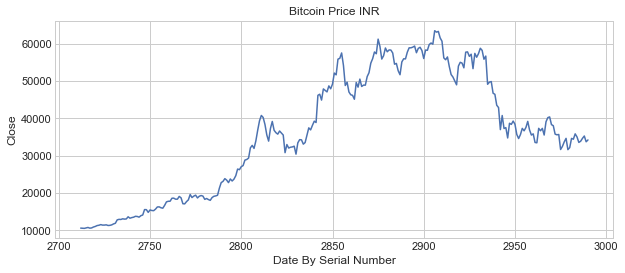

In [5]:
bitcoin2020_df.dropna()
plt.figure(figsize=(10, 4))
plt.title("Bitcoin Price INR")
plt.xlabel("Date By Serial Number")
plt.ylabel("Close")
plt.plot(bitcoin2020_df["Close"])
plt.show()

In [8]:
from autots import AutoTS

# Set forecast length for amount of time you want to predict future value.
# Compare predicted Bitcoin for real data elsewhere.
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple')
model = model.fit(bitcoin2020_df, date_col='Date', value_col='Close', id_col=None)
 
prediction = model.predict()
forecast = prediction.forecast
print("Bitcoin Price Prediction")
print(forecast)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
9/9 [==============================] - 3s 2ms/step - loss: 0.3698
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.3384
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3096
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.2557
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 7/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2224
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2135
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 0.2050
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1956
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1842
Epoch

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: 

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VECM
Model Number: 71 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 71: VECM
Model Number: 72 with model MultivariateMotif in generation 0 of 10
Model Number: 73 with model GLS in generation 0 of 10
Model Number: 74 with model MultivariateMotif in generation 0 of 10
Model Number: 75 with model DatepartRegression in generation 0 of 10
Epoch 1/50
7/7 [==============================] - 2s 43ms/step - loss: 101.8718 - val_loss: 76.9212
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 83.7592 - val_loss: 77.2920
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 83.4070 - val_loss: 57.6564
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 80.5546 - val_loss: 21.9186
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss:

Model Number: 114 with model SeasonalNaive in generation 0 of 10
Model Number: 115 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 115: GluonTS
Model Number: 116 with model SeasonalNaive in generation 0 of 10
Model Number: 117 with model GLS in generation 0 of 10
Model Number: 118 with model AverageValueNaive in generation 0 of 10
Model Number: 119 with model SeasonalNaive in generation 0 of 10
Model Number: 120 with model NVAR in generation 0 of 10
Model Number: 121 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 121: VECM
Model Number: 122 with model MultivariateMotif in generation 0 of 10
Model Number: 123 with model LastValueNaive in generation 0 of 10
Model Number: 124 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 124: ARDL
Model Nu

C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Model Number: 175 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 175: UnobservedComponents
Model Number: 176 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 176: UnobservedComponents
Model Number: 177 with model MultivariateRegression in generation 1 of 10
Model Number: 178 with model MultivariateRegression in generation 1 of 10
Model Number: 179 with model MultivariateRegression in generation 1 of 10
Model Number: 180 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 180: MultivariateRegression
Model Number: 181 with model WindowRegression in generation 1 of 10
Model Number: 182 with model WindowRegression in generation 1 of 10


C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 183 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 183: WindowRegression
Model Number: 184 with model GLS in generation 1 of 10
Model Number: 185 with model GLS in generation 1 of 10
Model Number: 186 with model GLS in generation 1 of 10
Model Number: 187 with model DatepartRegression in generation 1 of 10
Epoch 1/50
4/4 [==============================] - 3s 164ms/step - loss: nan - val_loss: nan
Epoch 2/50
4/4 [==============================] - 0s 69ms/step - loss: nan - val_loss: nan
Epoch 3/50
4/4 [==============================] - 0s 64ms/step - loss: nan - val_loss: nan
Epoch 4/50
4/4 [==============================] - 0s 66ms/step - loss: nan - val_loss: nan
Epoch 5/50
4/4 [==============================] - 0s 74ms/step - loss: nan - val_loss: nan
Epoch 6/50
4/4 [==============================] - 0s 78ms/step - loss: nan - val_loss: nan
Epoch 7/50
4/4 [==============

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished


Model Number: 189 with model DatepartRegression in generation 1 of 10
Model Number: 190 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 191 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 192 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 193 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 194 with model SeasonalNaive in generation 1 of 10
Model Number: 195 with model SeasonalNaive in generation 1 of 10
Model Number: 196 with model SeasonalNaive in generation 1 of 10
Model Number: 197 with model SeasonalNaive in generation 1 of 10
Model Number: 198 with model GLM in generation 1 of 10
Model Number: 199 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinit

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 216 with model FBProphet in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 216: FBProphet
Model Number: 217 with model FBProphet in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 217: FBProphet
Model Number: 218 with model ARDL in generation 1 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\zachg\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 218: ARDL
Model Number: 219 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 219: ARDL
Model Number: 220 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 220: ARDL
Model Number: 221 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but 

C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 252 with model Theta in generation 2 of 10
Model Number: 253 with model Theta in generation 2 of 10
Model Number: 254 with model Theta in generation 2 of 10
Model Number: 255 with model Theta in generation 2 of 10
Model Number: 256 with model ZeroesNaive in generation 2 of 10
Model Number: 257 with model ZeroesNaive in generation 2 of 10
Model Number: 258 with model ZeroesNaive in generation 2 of 10
Model Number: 259 with model UnobservedComponents in generation 2 of 10
Model Number: 260 with model UnobservedComponents in generation 2 of 10
Model Number: 261 with model UnobservedComponents in generation 2 of 10
Model Number: 262 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 262: DatepartRegression
Model Number: 263 with model DatepartRegression in generation 2 of 10
Model Number: 264 with model DatepartRegression in generation 2 of 10
Model Number: 265 with model GLS in

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903388402.304602, tolerance: 183003.16776380903
  model = cd_fast.enet_coordinate_descent(


Model Number: 267 with model GLS in generation 2 of 10
Model Number: 268 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 268: WindowRegression
Model Number: 269 with model WindowRegression in generation 2 of 10
Model Number: 270 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 270: WindowRegression
Model Number: 271 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 272 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal co

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 273 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 274 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 275 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 275: GLM
Model Number: 276 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 276: GLM
Model Number: 277 with model GLM in generation 2 of 10
Model Number: 278 with model GLM in gener

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 290 with model VECM in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 290: VECM
Model Number: 291 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 291: FBProphet
Model Number: 292 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 292: FBProphet
Model Number: 293 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 293: FBProphet
Model Number: 294 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 294: FBProphet
Model Number: 295 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 295: ARDL
Model Number: 296 with model ARDL in generation

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 311 with model MultivariateRegression in generation 3 of 10
Model Number: 312 with model MultivariateRegression in generation 3 of 10
Model Number: 313 with model MultivariateRegression in generation 3 of 10
Model Number: 314 with model ZeroesNaive in generation 3 of 10
Model Number: 315 with model ZeroesNaive in generation 3 of 10
Model Number: 316 with model SectionalMotif in generation 3 of 10
Model Number: 317 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (51)') in model 317: SectionalMotif
Model Number: 318 with model SectionalMotif in generation 3 of 10
Model Number: 319 with model SectionalMotif in generation 3 of 10
Model Number: 320 with model NVAR in generation 3 of 10
Model Number: 321 with model NVAR in generation 3 of 10


C:\Users\zachg\anaconda3\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\zachg\anaconda3\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 322 with model NVAR in generation 3 of 10
Model Number: 323 with model NVAR in generation 3 of 10
Model Number: 324 with model DatepartRegression in generation 3 of 10
Model Number: 325 with model DatepartRegression in generation 3 of 10
Model Number: 326 with model DatepartRegression in generation 3 of 10
Model Number: 327 with model MultivariateMotif in generation 3 of 10
Model Number: 328 with model MultivariateMotif in generation 3 of 10
Model Number: 329 with model MultivariateMotif in generation 3 of 10
Model Number: 330 with model MultivariateMotif in generation 3 of 10


C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 331 with model LastValueNaive in generation 3 of 10
Model Number: 332 with model LastValueNaive in generation 3 of 10
Model Number: 333 with model LastValueNaive in generation 3 of 10
Model Number: 334 with model Theta in generation 3 of 10
Model Number: 335 with model Theta in generation 3 of 10
Model Number: 336 with model Theta in generation 3 of 10
Model Number: 337 with model Theta in generation 3 of 10
Model Number: 338 with model SeasonalNaive in generation 3 of 10
Model Number: 339 with model SeasonalNaive in generation 3 of 10
Model Number: 340 with model SeasonalNaive in generation 3 of 10
Model Number: 341 with model SeasonalNaive in generation 3 of 10
Model Number: 342 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 342: UnobservedComponents
Model Number: 343 with model UnobservedComponents in generation 3 of 10
Model Number: 344 with model UnobservedCompo

Model Number: 409 with model LastValueNaive in generation 4 of 10
Model Number: 410 with model LastValueNaive in generation 4 of 10
Model Number: 411 with model Theta in generation 4 of 10


C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 412 with model Theta in generation 4 of 10
Model Number: 413 with model Theta in generation 4 of 10
Model Number: 414 with model Theta in generation 4 of 10
Model Number: 415 with model GLS in generation 4 of 10
Model Number: 416 with model GLS in generation 4 of 10
Model Number: 417 with model GLS in generation 4 of 10
Model Number: 418 with model SeasonalNaive in generation 4 of 10
Model Number: 419 with model SeasonalNaive in generation 4 of 10
Model Number: 420 with model SeasonalNaive in generation 4 of 10
Model Number: 421 with model SeasonalNaive in generation 4 of 10
Model Number: 422 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 423 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive whe

C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 470 with model MultivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 470: MultivariateRegression
Model Number: 471 with model MultivariateRegression in generation 5 of 10
Model Number: 472 with model MultivariateRegression in generation 5 of 10


C:\Users\zachg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:1078: RuntimeWarning: All-NaN slice encountered
  max_abs = np.nanmax(np.abs(X), axis=0)


Model Number: 473 with model MultivariateRegression in generation 5 of 10
Model Number: 474 with model MultivariateMotif in generation 5 of 10
Model Number: 475 with model MultivariateMotif in generation 5 of 10
Model Number: 476 with model MultivariateMotif in generation 5 of 10
Model Number: 477 with model MultivariateMotif in generation 5 of 10
Model Number: 478 with model ZeroesNaive in generation 5 of 10
Model Number: 479 with model ZeroesNaive in generation 5 of 10
Model Number: 480 with model SeasonalNaive in generation 5 of 10
Model Number: 481 with model SeasonalNaive in generation 5 of 10
Model Number: 482 with model SeasonalNaive in generation 5 of 10
Model Number: 483 with model SeasonalNaive in generation 5 of 10
Model Number: 484 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 484: DatepartRegression
Model Number: 485 with model DatepartRegression in generation 5 of 10
Mo

C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Model Number: 527 with model Theta in generation 6 of 10
Model Number: 528 with model Theta in generation 6 of 10
Model Number: 529 with model NVAR in generation 6 of 10
Model Number: 530 with model NVAR in generation 6 of 10
Model Number: 531 with model NVAR in generation 6 of 10
Model Number: 532 with model NVAR in generation 6 of 10
Model Number: 533 with model UnivariateMotif in generation 6 of 10
Model Number: 534 with model UnivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer HPFilter failed on fit') in model 534: UnivariateMotif
Model Number: 535 with model UnivariateMotif in generation 6 of 10
Model Number: 536 with model UnivariateMotif in generation 6 of 10
Model Number: 537 with model AverageValueNaive in generation 6 of 10
Model Number: 538 with model AverageValueNaive in generation 6 of 10
Model Number: 539 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 539: G

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: divide by zero encountered in true_divide
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:798: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 543 with model MultivariateRegression in generation 6 of 10
Model Number: 544 with model MultivariateRegression in generation 6 of 10
Model Number: 545 with model MultivariateRegression in generation 6 of 10
Model Number: 546 with model MultivariateMotif in generation 6 of 10
Model Number: 547 with model MultivariateMotif in generation 6 of 10
Model Number: 548 with model MultivariateMotif in generation 6 of 10
Model Number: 549 with model MultivariateMotif in generation 6 of 10
Model Number: 550 with model ZeroesNaive in generation 6 of 10
Model Number: 551 with model ZeroesNaive in generation 6 of 10
Model Number: 552 with model ZeroesNaive in generation 6 of 10
Model Number: 553 with model SeasonalNaive in generation 6 of 10
Model Number: 554 with model SeasonalNaive in generation 6 of 10
Model Number: 555 with model SeasonalNaive in generation 6 of 10
Model Number: 556 with model SeasonalNaive in generation 6 of 10
Model Number: 557 with model DatepartRegression in ge

Template Eval Error: ValueError('Only gave one variable to VAR') in model 586: VAR
Model Number: 587 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 587: VAR
Model Number: 588 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 588: VECM
Model Number: 589 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 589: VECM
Model Number: 590 with model VECM in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 590: VECM
Model Number: 591 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 591: VECM
Model Number: 592 with model FBProphet in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 592: FBProphet
Model Number: 593 with model FBProp

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 618 with model SeasonalNaive in generation 7 of 10
Model Number: 619 with model SeasonalNaive in generation 7 of 10
Model Number: 620 with model SeasonalNaive in generation 7 of 10
Model Number: 621 with model SeasonalNaive in generation 7 of 10
Model Number: 622 with model MultivariateRegression in generation 7 of 10
Model Number: 623 with model MultivariateRegression in generation 7 of 10
Model Number: 624 with model MultivariateRegression in generation 7 of 10
Model Number: 625 with model MultivariateRegression in generation 7 of 10
Model Number: 626 with model MultivariateMotif in generation 7 of 10
Model Number: 627 with model MultivariateMotif in generation 7 of 10
Model Number: 628 with model MultivariateMotif in generation 7 of 10
Model Number: 629 with model MultivariateMotif in generation 7 of 10
Model Number: 630 with model ZeroesNaive in generation 7 of 10
Model Number: 631 with model ZeroesNaive in generation 7 of 10
Model Number: 632 with model ZeroesNaive i

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 652 with model UnobservedComponents in generation 7 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 652: UnobservedComponents
Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 655: GluonTS
Model Number: 656 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 656: GluonTS
Model Number: 657 with model VAR in generation 7 

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 699 with model SeasonalNaive in generation 8 of 10
Model Number: 700 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError('Loss squared_error is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.') in model 700: MultivariateRegression
Model Number: 701 with model MultivariateRegression in generation 8 of 10
Model Number: 702 with model MultivariateRegression in generation 8 of 10
Model Number: 703 with model MultivariateRegression in generation 8 of 10
Model Number: 704 with model MultivariateMotif in generation 8 of 10
Model Number: 705 with model MultivariateMotif in generation 8 of 10
Model Number: 706 with model MultivariateMotif in generation 8 of 10
Model Number: 707 with model MultivariateMotif in generation 8 of 10
Model Number: 708 with model ZeroesNaive in generation 8 of 10
Model Number: 709 with model ZeroesNaive in generation 8 of 10
Model Number: 710 with mode

9/9 [==============================] - 0s 4ms/step - loss: 35526.5312
Epoch 131/500
9/9 [==============================] - 0s 5ms/step - loss: 35526.2969
Epoch 132/500
9/9 [==============================] - 0s 5ms/step - loss: 35526.0625
Epoch 133/500
9/9 [==============================] - 0s 4ms/step - loss: 35525.8320
Epoch 134/500
9/9 [==============================] - 0s 4ms/step - loss: 35525.5938
Epoch 135/500
9/9 [==============================] - 0s 4ms/step - loss: 35525.3555
Epoch 136/500
9/9 [==============================] - 0s 4ms/step - loss: 35525.1250
Epoch 137/500
9/9 [==============================] - 0s 4ms/step - loss: 35524.8945
Epoch 138/500
9/9 [==============================] - 0s 4ms/step - loss: 35524.6562
Epoch 139/500
9/9 [==============================] - 0s 4ms/step - loss: 35524.4219
Epoch 140/500
9/9 [==============================] - 0s 4ms/step - loss: 35524.1914
Epoch 141/500
9/9 [==============================] - 0s 4ms/step - loss: 35523.9609
Epoch 

9/9 [==============================] - 0s 4ms/step - loss: 35481.1367
Epoch 325/500
9/9 [==============================] - 0s 4ms/step - loss: 35480.9062
Epoch 326/500
9/9 [==============================] - 0s 4ms/step - loss: 35480.6680
Epoch 327/500
9/9 [==============================] - 0s 4ms/step - loss: 35480.4336
Epoch 328/500
9/9 [==============================] - 0s 4ms/step - loss: 35480.1992
Epoch 329/500
9/9 [==============================] - 0s 5ms/step - loss: 35479.9688
Epoch 330/500
9/9 [==============================] - 0s 5ms/step - loss: 35479.7305
Epoch 331/500
9/9 [==============================] - 0s 4ms/step - loss: 35479.5000
Epoch 332/500
9/9 [==============================] - 0s 4ms/step - loss: 35479.2656
Epoch 333/500
9/9 [==============================] - 0s 5ms/step - loss: 35479.0312
Epoch 334/500
9/9 [==============================] - 0s 4ms/step - loss: 35478.7969
Epoch 335/500
9/9 [==============================] - 0s 4ms/step - loss: 35478.5625
Epoch 

Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 729: GluonTS
Model Number: 730 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 730: GluonTS
Model Number: 731 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 731: GluonTS
Model Number: 732 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 732: VAR
Model Number: 733 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 733: VAR
Model Number: 734 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 734: VAR
Model Number: 735 with model VAR in generation 8 of

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 774 with model SeasonalNaive in generation 9 of 10
Model Number: 775 with model MultivariateRegression in generation 9 of 10
Model Number: 776 with model MultivariateRegression in generation 9 of 10
Model Number: 777 with model MultivariateRegression in generation 9 of 10
Model Number: 778 with model MultivariateRegression in generation 9 of 10
Model Number: 779 with model MultivariateMotif in generation 9 of 10
Model Number: 780 with model MultivariateMotif in generation 9 of 10
Model Number: 781 with model MultivariateMotif in generation 9 of 10
Model Number: 782 with model MultivariateMotif in generation 9 of 10
Model Number: 783 with model ZeroesNaive in generation 9 of 10
Model Number: 784 with model ZeroesNaive in generation 9 of 10
Model Number: 785 with model ZeroesNaive in generation 9 of 10
Model Number: 786 with model DatepartRegression in generation 9 of 10
Epoch 1/500
17/17 [==============================] - 3s 6ms/step - loss: 0.1830
Epoch 2/500
17/17 [=====

17/17 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 192/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 193/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 194/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 195/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 196/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 197/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 198/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 199/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 200/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 201/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 202/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 203/500
17/17 [=========

17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 292/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 293/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 294/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 295/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 296/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 297/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 298/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 299/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 300/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 301/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 302/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 303/500
17/17 [=========

17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 392/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 393/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 394/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 395/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 396/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 397/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 398/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 399/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 400/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 401/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 402/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 403/500
17/17 [=========

17/17 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 492/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 493/500
17/17 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 494/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 495/500
17/17 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 496/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 497/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 498/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 499/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 500/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0022
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 786: DatepartRegression
Model Number: 787 with model DatepartR

Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 818: FBProphet
Model Number: 819 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 819: FBProphet
Model Number: 820 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 820: FBProphet
Model Number: 821 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 821: ARDL
Model Number: 822 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\zachg\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 822: ARDL
Model Number: 823 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 823: ARDL
Model Number: 824 with

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear]Model Number: 852 with model MultivariateRegression in generation 10 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 853 with model MultivariateRegression in generation 10 of 10
[LibLinear]

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Model Number: 854 with model MultivariateRegression in generation 10 of 10
Model Number: 855 with model MultivariateMotif in generation 10 of 10
Model Number: 856 with model MultivariateMotif in generation 10 of 10
Model Number: 857 with model MultivariateMotif in generation 10 of 10
Model Number: 858 with model MultivariateMotif in generation 10 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 858: MultivariateMotif
Model Number: 859 with model ZeroesNaive in generation 10 of 10
Model Number: 860 with model ZeroesNaive in generation 10 of 10
Template Eval Error: KeyError(Timestamp('2020-10-01 00:00:00', freq='D')) in model 860: ZeroesNaive
Model Number: 861 with model ZeroesNaive in generation 10 of 10
Model Number: 862 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 862: DatepartRegression
Model 

C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\zachg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Model Number: 870 with model GLS in generation 10 of 10
Model Number: 871 with model ETS in generation 10 of 10
Model Number: 872 with model ETS in generation 10 of 10
Model Number: 873 with model ETS in generation 10 of 10
Model Number: 874 with model ETS in generation 10 of 10
Model Number: 875 with model WindowRegression in generation 10 of 10
Model Number: 876 with model WindowRegression in generation 10 of 10
Model Number: 877 with model WindowRegression in generation 10 of 10
Model Number: 878 with model Ensemble in generation 11 of 0
Model Number: 879 with model Ensemble in generation 11 of 0
Model Number: 880 with model Ensemble in generation 11 of 0
Model Number: 881 with model Ensemble in generation 11 of 0
Model Number: 882 with model Ensemble in generation 11 of 0
Model Number: 883 with model Ensemble in generation 11 of 0
Model Number: 884 with model Ensemble in generation 11 of 0
Model Number: 885 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number:

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


46 - MultivariateRegression with avg smape 12.17: 
Model Number: 47 of 133 with model GLM for Validation 1
47 - GLM with avg smape 9.93: 
Model Number: 48 of 133 with model MultivariateMotif for Validation 1
48 - MultivariateMotif with avg smape 5.38: 
Model Number: 49 of 133 with model SectionalMotif for Validation 1
49 - SectionalMotif with avg smape 12.66: 
Model Number: 50 of 133 with model SeasonalNaive for Validation 1
50 - SeasonalNaive with avg smape 13.13: 
Model Number: 51 of 133 with model ZeroesNaive for Validation 1
51 - ZeroesNaive with avg smape 10.31: 
Model Number: 52 of 133 with model NVAR for Validation 1
52 - NVAR with avg smape 13.29: 
Model Number: 53 of 133 with model NVAR for Validation 1
53 - NVAR with avg smape 12.28: 
Model Number: 54 of 133 with model SectionalMotif for Validation 1
54 - SectionalMotif with avg smape 12.03: 
Model Number: 55 of 133 with model MultivariateMotif for Validation 1
55 - MultivariateMotif with avg smape 15.84: 
Model Number: 56 of

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


64 - GLM with avg smape 11.99: 
Model Number: 65 of 133 with model MultivariateMotif for Validation 1
65 - MultivariateMotif with avg smape 9.03: 
Model Number: 66 of 133 with model MultivariateRegression for Validation 1
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]66 - MultivariateRegression with avg smape 12.55: 
Model Number: 67 of 133 with model MultivariateMotif for Validation 1
67 - MultivariateMotif with avg smape 5.32: 
Model Number: 68 of 133 with model MultivariateRegression for Validation 1
68 - MultivariateRegression with avg smape 6.22: 
Model Number: 69 of 133 with model MultivariateMotif for Validation 1
69 - MultivariateMotif with avg smape 5.66: 
Model Number: 70 of 133 with model DatepartRegression for Validation 1
70 - DatepartRegression with avg smape 3.39: 
Model Number: 71 of 133 with model ZeroesNaive for Validation 1
71 - ZeroesNaive with avg smape 10.09: 
Model Number: 72 of 133 with m

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished


124 - DatepartRegression with avg smape 7.75: 
Model Number: 125 of 133 with model GLS for Validation 1
125 - GLS with avg smape 13.24: 
Model Number: 126 of 133 with model GLS for Validation 1
126 - GLS with avg smape 13.24: 
Model Number: 127 of 133 with model GLS for Validation 1


[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


127 - GLS with avg smape 13.24: 
Model Number: 128 of 133 with model GLS for Validation 1
128 - GLS with avg smape 13.24: 
Model Number: 129 of 133 with model UnobservedComponents for Validation 1
129 - UnobservedComponents with avg smape 10.8: 
Model Number: 130 of 133 with model WindowRegression for Validation 1
130 - WindowRegression with avg smape 15.16: 
Model Number: 131 of 133 with model UnobservedComponents for Validation 1
131 - UnobservedComponents with avg smape 11.73: 
Model Number: 132 of 133 with model GLS for Validation 1
132 - GLS with avg smape 18.36: 
Model Number: 133 of 133 with model UnobservedComponents for Validation 1
133 - UnobservedComponents with avg smape 3.4: 
Validation Round: 2
Model Number: 1 of 133 with model Ensemble for Validation 2
1 - Ensemble with avg smape 4.64: 
Model Number: 2 of 133 with model Ensemble for Validation 2
2 - Ensemble with avg smape 4.94: 
Model Number: 3 of 133 with model Ensemble for Validation 2
3 - Ensemble with avg smape 6.24

C:\Users\zachg\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


45 - SectionalMotif with avg smape 9.97: 
Model Number: 46 of 133 with model MultivariateRegression for Validation 2
46 - MultivariateRegression with avg smape 4.38: 
Model Number: 47 of 133 with model GLM for Validation 2
47 - GLM with avg smape 5.56: 
Model Number: 48 of 133 with model MultivariateMotif for Validation 2
48 - MultivariateMotif with avg smape 6.64: 
Model Number: 49 of 133 with model SectionalMotif for Validation 2
49 - SectionalMotif with avg smape 4.67: 
Model Number: 50 of 133 with model SeasonalNaive for Validation 2
50 - SeasonalNaive with avg smape 5.94: 
Model Number: 51 of 133 with model ZeroesNaive for Validation 2
51 - ZeroesNaive with avg smape 5.34: 
Model Number: 52 of 133 with model NVAR for Validation 2
52 - NVAR with avg smape 5.38: 
Model Number: 53 of 133 with model NVAR for Validation 2
53 - NVAR with avg smape 4.89: 
Model Number: 54 of 133 with model SectionalMotif for Validation 2
54 - SectionalMotif with avg smape 5.0: 
Model Number: 55 of 133 wi

C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\zachg\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



67 - MultivariateMotif with avg smape 10.49: 
Model Number: 68 of 133 with model MultivariateRegression for Validation 2
68 - MultivariateRegression with avg smape 7.75: 
Model Number: 69 of 133 with model MultivariateMotif for Validation 2
69 - MultivariateMotif with avg smape 12.69: 
Model Number: 70 of 133 with model DatepartRegression for Validation 2
70 - DatepartRegression with avg smape 7.95: 
Model Number: 71 of 133 with model ZeroesNaive for Validation 2
71 - ZeroesNaive with avg smape 5.34: 
Model Number: 72 of 133 with model MultivariateMotif for Validation 2
72 - MultivariateMotif with avg smape 10.87: 
Model Number: 73 of 133 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 6.49: 
Model Number: 74 of 133 with model ZeroesNaive for Validation 2
74 - ZeroesNaive with avg smape 5.74: 
Model Number: 75 of 133 with model ZeroesNaive for Validation 2
75 - ZeroesNaive with avg smape 5.74: 
Model Number: 76 of 133 with model MultivariateRegressi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    0.0s


124 - DatepartRegression with avg smape 9.92: 
Model Number: 125 of 133 with model GLS for Validation 2
125 - GLS with avg smape 5.32: 
Model Number: 126 of 133 with model GLS for Validation 2
126 - GLS with avg smape 5.32: 
Model Number: 127 of 133 with model GLS for Validation 2


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=11)]: Using backend ThreadingBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 300 out of 300 | elapsed:    0.0s finished


127 - GLS with avg smape 5.32: 
Model Number: 128 of 133 with model GLS for Validation 2
128 - GLS with avg smape 5.32: 
Model Number: 129 of 133 with model UnobservedComponents for Validation 2
129 - UnobservedComponents with avg smape 5.9: 
Model Number: 130 of 133 with model WindowRegression for Validation 2
130 - WindowRegression with avg smape 4.48: 
Model Number: 131 of 133 with model UnobservedComponents for Validation 2
131 - UnobservedComponents with avg smape 6.35: 
Model Number: 132 of 133 with model GLS for Validation 2
132 - GLS with avg smape 5.63: 
Model Number: 133 of 133 with model UnobservedComponents for Validation 2
133 - UnobservedComponents with avg smape 11.23: 
Bitcoin Price Prediction
                   Close
2021-07-07  34405.248662
2021-07-08  34794.301302
2021-07-09  35276.827200
2021-07-10  35848.925852
2021-07-11  36505.014698
2021-07-12  37238.229376
2021-07-13  38041.136356
2021-07-14  38903.870180
2021-07-15  39813.701463
2021-07-16  40757.946341


In [9]:
bitcoin_df_two = pd.read_csv("./Resources/BTC-USD.csv")

In [10]:
bitcoin_df_two

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2705,2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2706,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2707,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051


In [33]:
bitcoin_df_two.loc[2496,'Close']
# 2496 is row name for last date we want.

31796.810547

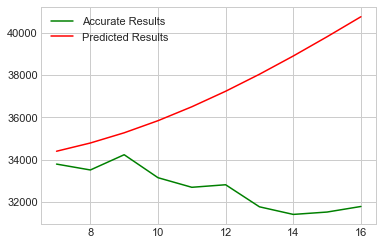

In [5]:
x = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
accurate_results = [33798,33520,34240,33155,32702,32822,31780,31421,31533,31796]
prediction_results = [34405,34794,35276,35848,36505,37238,38041,38903,39813,40757]

# Plot a simple line chart
plt.plot(x, accurate_results, color='green', label='Accurate Results')

# Plot another line on the same chart/graph
plt.plot(x, prediction_results, color='red', label='Predicted Results')

plt.legend()
plt.show()